In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
parkinson_data = pd.read_csv("synthetic_mdvp_data.csv")

In [3]:
parkinson_data.head()
print(parkinson_data.shape)

(12044, 17)


In [4]:
parkinson_data.columns

Index(['Jitter:RAP', 'Jitter:DDP', 'RPDE', 'Shimmer:APQ3', 'Jitter(%)',
       'Shimmer', 'Shimmer(dB)', 'PPE', 'Jitter(Abs)', 'Shimmer:APQ11', 'NHR',
       'Shimmer:DDA', 'DFA', 'Shimmer:APQ5', 'Jitter:PPQ5', 'HNR', 'status'],
      dtype='object')

In [5]:
data = parkinson_data.copy()

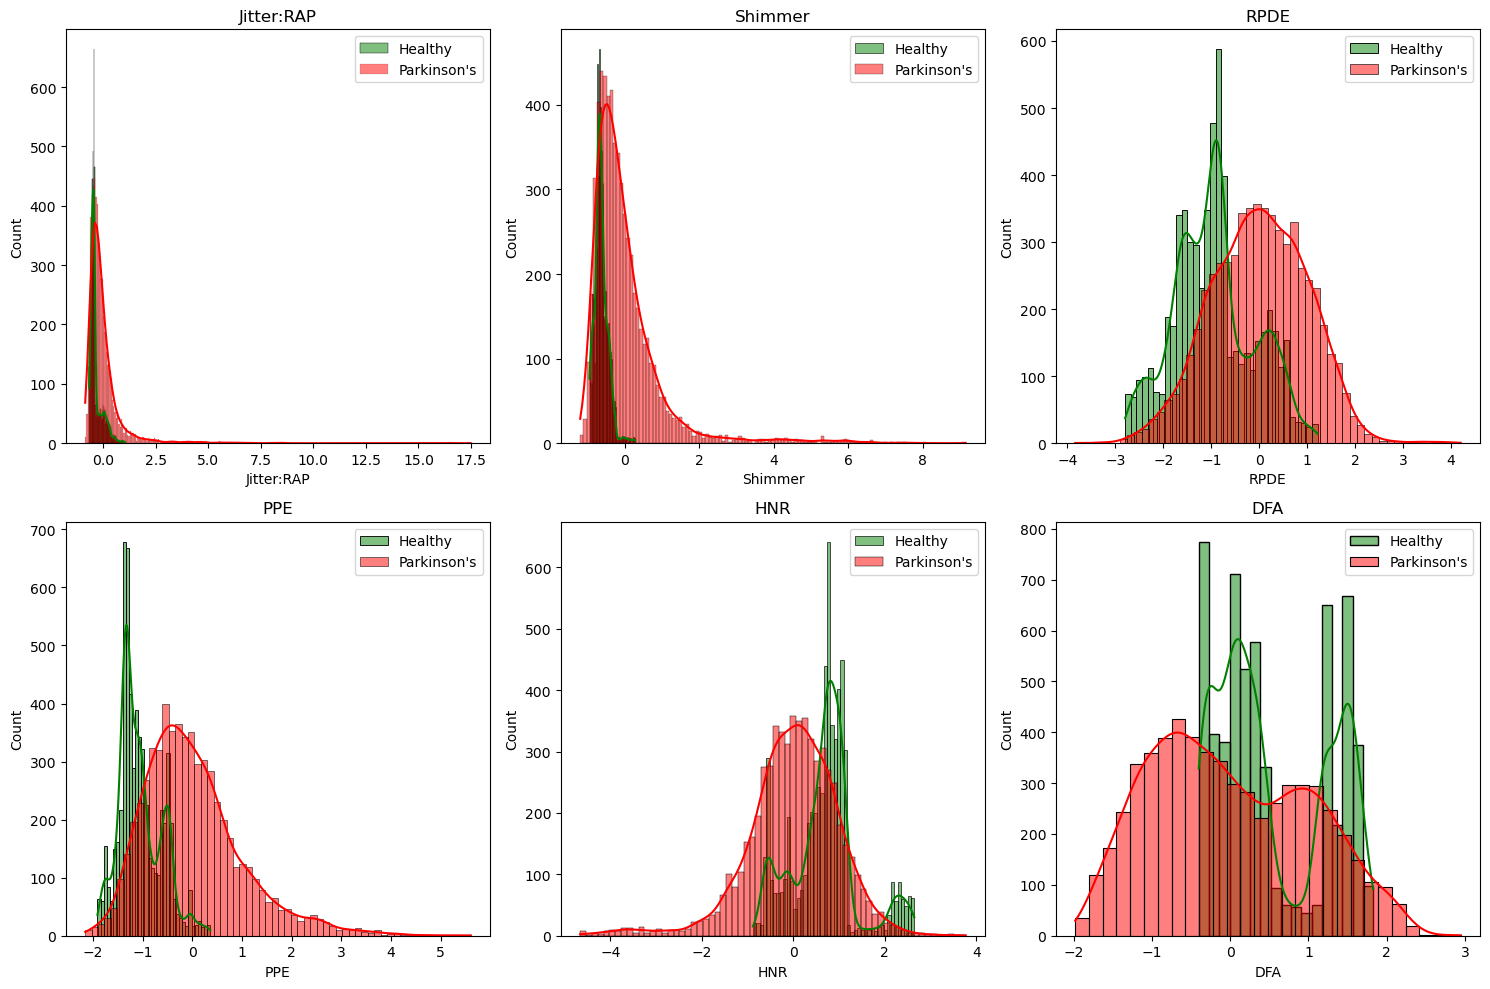

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of features for visualization
selected_features = ['Jitter:RAP', 'Shimmer', 'RPDE', 'PPE', 'HNR','DFA']

# Setting up the plot
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[data['status'] == 0][feature], color='green', label='Healthy', kde=True)
    sns.histplot(data[data['status'] == 1][feature], color='red', label='Parkinson\'s', kde=True)
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'status vs DFA')

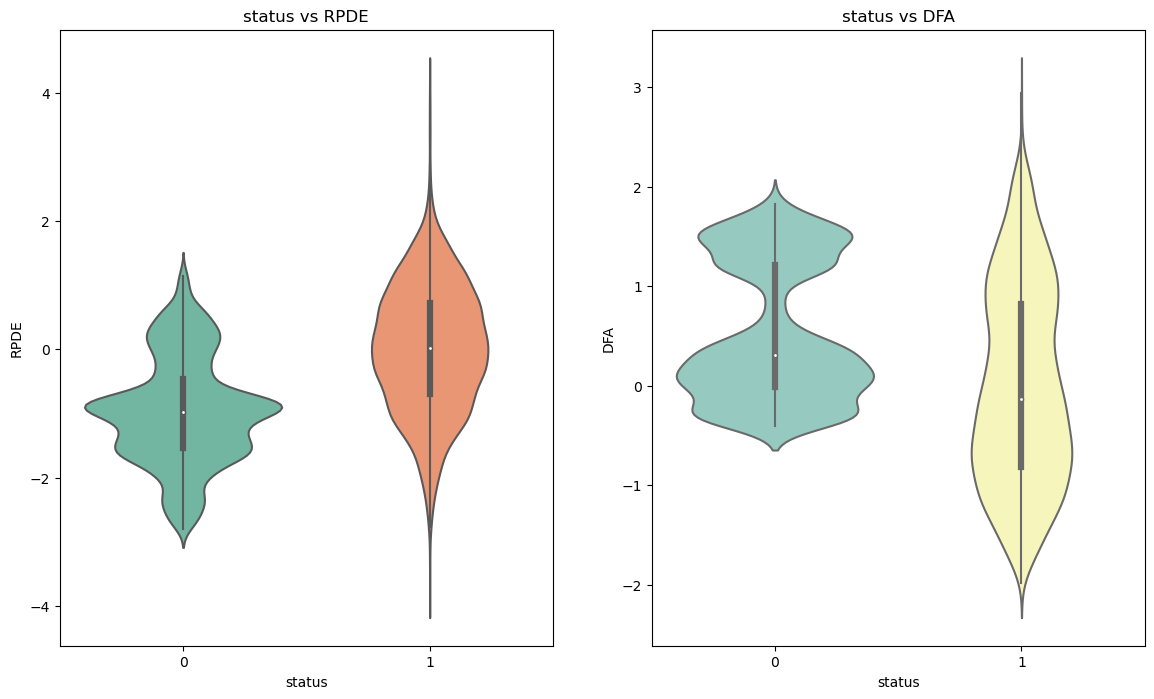

In [7]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.violinplot(x="status", y="RPDE", data=data, ax=axis1, palette="Set2")
axis1.set_title("status vs RPDE")

sns.violinplot(x="status", y="DFA", data=data, ax=axis2, palette="Set3")
axis2.set_title("status vs DFA")

Text(0.5, 1.0, 'status vs HNR')

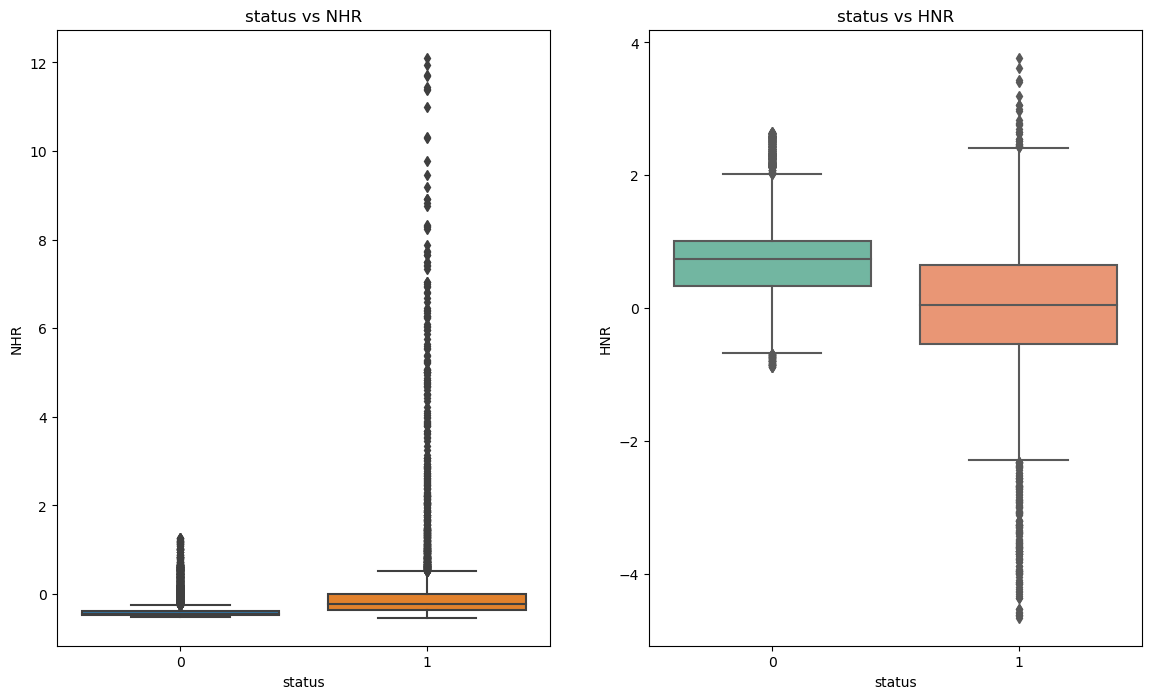

In [8]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(x="status", y="NHR", data=data, ax=axis1)
axis1.set_title("status vs NHR")

sns.boxplot(x="status", y="HNR", data=data, ax=axis2, palette="Set2")
axis2.set_title("status vs HNR")

In [9]:
labels = data['status'].values
features = data.drop('status', axis=1).values
print(labels)


[1 1 1 ... 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scled_features = scaler.fit_transform(features)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scled_features, labels, test_size=0.3)

In [14]:
print("X_train shape = {}".format(X_train.shape))
print("y_train shape = {}".format(y_train.shape))
print("X_test shape =  {}".format(X_test.shape))
print("y_test shape =  {}".format(y_test.shape))

X_train shape = (8430, 16)
y_train shape = (8430,)
X_test shape =  (3614, 16)
y_test shape =  (3614,)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier

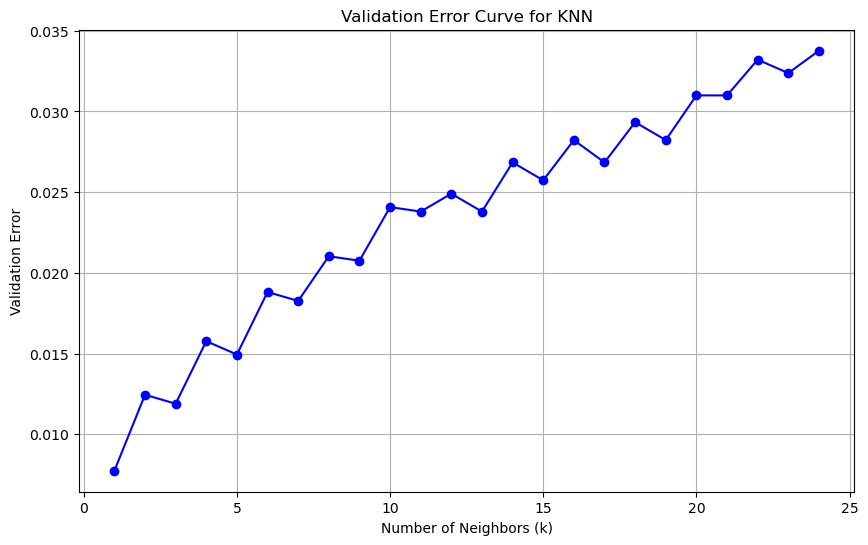

In [17]:
k_values = np.arange(1, 25)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title('Validation Error Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Error')
plt.grid(True)
plt.show()

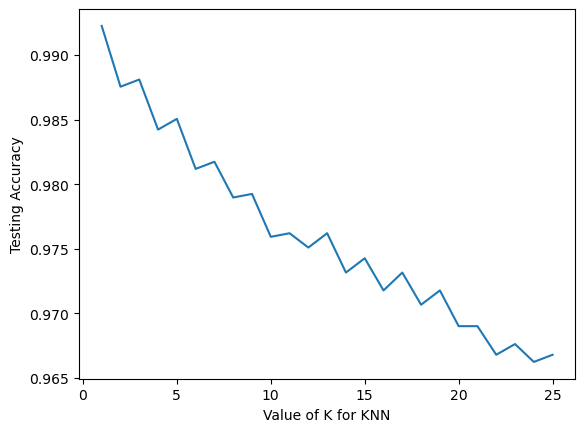

In [18]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plotting
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

The optimal number of neighbors is: 1
[0.9928825622775801, 0.9880189798339265, 0.9884934756820879, 0.9846975088967971, 0.9851720047449586, 0.9810201660735469, 0.9817319098457888, 0.9788849347568209, 0.9791221826809016, 0.976868327402135, 0.9776986951364174, 0.9753262158956109, 0.9767497034400948, 0.9741399762752077, 0.9749703440094899, 0.9717674970344008, 0.9724792408066429, 0.969988137603796, 0.9705812574139976, 0.9679715302491104, 0.9684460260972717, 0.9663107947805457, 0.966785290628707, 0.963938315539739, 0.9645314353499407]


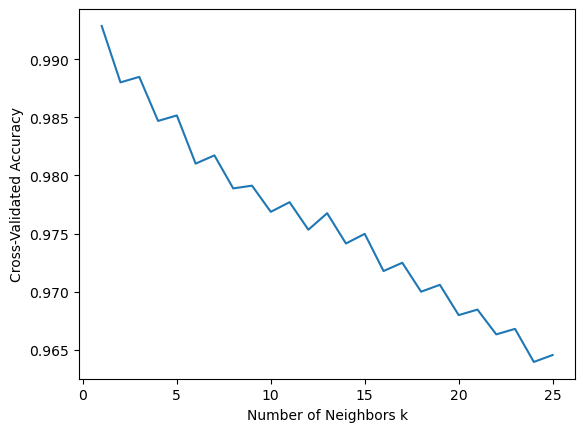

In [19]:
cv_scores = []
k_values = list(range(1, 26))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is:", optimal_k)
print(cv_scores)
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [66]:
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, accuracy_score)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

KNN with k=15 got 96.67957941339236% accuracy on the test set.
Accuracy: 0.97
Confusion Matrix:
[[1771    0]
 [ 120 1723]]
Precision: 1.00
Recall: 0.93
F1 Score: 0.97
ROC AUC: 0.9971326180248308


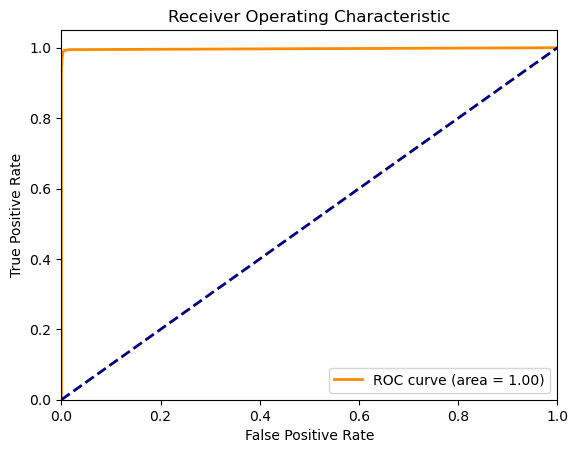

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1771
           1       1.00      0.93      0.97      1843

    accuracy                           0.97      3614
   macro avg       0.97      0.97      0.97      3614
weighted avg       0.97      0.97      0.97      3614



In [67]:
print("KNN with k=15 got {}% accuracy on the test set.".format(accuracy_score(y_test, knn.predict(X_test))*100))
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(set(y_test)) > 1 else "Only one class present in y_true."

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# A full classification report
print(classification_report(y_test, y_pred))

In [23]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [24]:
lr = LogisticRegression(max_iter = 120000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=120000)

Logistic regression - default, got 92.03099059214168% accuracy on the test set.


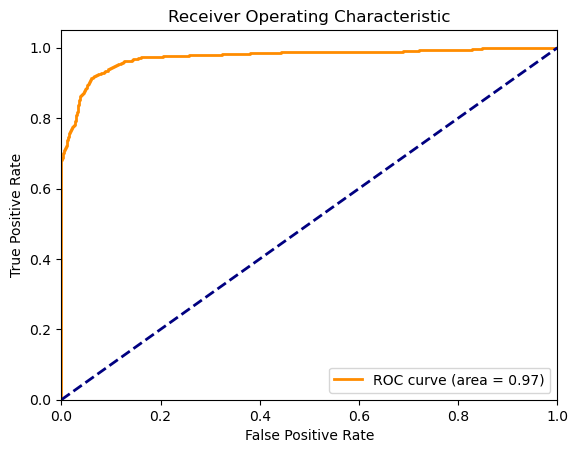

Accuracy: 0.92
Confusion Matrix:
[[1671  100]
 [ 188 1655]]
Precision: 0.94
Recall: 0.90
F1 Score: 0.92
ROC AUC: 0.9728724647689474


In [25]:
print("Logistic regression - default, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr.predict(X_test))*100))

y_pred = lr.predict(X_test)

# Get probability estimates for the positive class
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else "Only one class present in y_true."

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc}")

In [44]:
# import numpy as np

# # Specify the range for C using a logarithmic scale
# # For example, from 1e-4 to 1e4
# C_values = np.logspace(-4, 4, 20)

# # You can then use these values in a grid search
# param_grid = {'C': C_values}

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Create a logistic regression model
# logreg = LogisticRegression(penalty='l2', max_iter=120000)

# # Set up the grid search with the C values and logistic regression model
# grid_search = GridSearchCV(logreg, param_grid={'C': C_values}, cv=5, scoring='accuracy')

# # Perform the grid search on your data
# # Make sure to replace X_train and y_train with your actual data
# grid_search.fit(X_train, y_train)
# best_C = grid_search.best_params_['C']
# print(f"The best value of C found: {best_C}")

import numpy as np
# Specify the range for C using a logarithmic scale
# For example, from 1e-4 to 1e4
C_values = np.logspace(-4, 4, 20)
# You can then use these values in a grid search
param_grid = {'C': C_values}
11
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression(penalty='l2', max_iter=120000)
# Set up the grid search with the C values and logistic regression model
grid_search = GridSearchCV(logreg, param_grid={'C': C_values}, cv=5,scoring='accuracy')
# Perform the grid search on your data
# Make sure to replace X_train and y_train with your actual data
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
print(f"The best value of C found: {best_C}")

The best value of C found: 10000.0


In [45]:
lr_tuned = LogisticRegression(C=3792.609, penalty='l2', max_iter = 120000)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=3792.609, max_iter=120000)

In [46]:
print("Logistic regression - tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr_tuned.predict(X_test))*100))
y_pred = lr_tuned.predict(X_test)

# Get probability estimates for the positive class
y_pred_proba = lr_tuned.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else "Only one class present in y_true."

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc}")

Logistic regression - tuned, got 93.44216934144993% accuracy on the test set.
Accuracy: 0.93
Confusion Matrix:
[[1679   92]
 [ 145 1698]]
Precision: 0.95
Recall: 0.92
F1 Score: 0.93
ROC AUC: 0.9749766617350188


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
print("Decision tree classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, dtc.predict(X_test))*100))
y_pred = dtc.predict(X_test)

# Get probability estimates for the positive class
y_pred_proba = dtc.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(set(y_test)) > 1 else "Only one class present in y_true."

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc}")

Decision tree classifier, got 98.72717210846707% accuracy on the test set.
Accuracy: 0.99
Confusion Matrix:
[[1782   20]
 [  26 1786]]
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
ROC AUC: 0.98727621749687


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
for k in range(100, 1001,100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    print("Random forest classifier,{} got {}% accuracy on the test set.".format(k,accuracy_score(y_test, rfc.predict(X_test))*100))

Random forest classifier,100 got 99.55727725511898% accuracy on the test set.
Random forest classifier,200 got 99.61261759822911% accuracy on the test set.
Random forest classifier,300 got 99.61261759822911% accuracy on the test set.
Random forest classifier,400 got 99.61261759822911% accuracy on the test set.
Random forest classifier,500 got 99.61261759822911% accuracy on the test set.
Random forest classifier,600 got 99.64028776978418% accuracy on the test set.
Random forest classifier,700 got 99.61261759822911% accuracy on the test set.
Random forest classifier,800 got 99.58494742667405% accuracy on the test set.
Random forest classifier,900 got 99.61261759822911% accuracy on the test set.
Random forest classifier,1000 got 99.64028776978418% accuracy on the test set.


In [33]:
print("Random forest classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, rfc.predict(X_test))*100))
y_pred = rfc.predict(X_test)

# Get probability estimates for the positive class
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if len(set(y_test)) > 1 else "Only one class present in y_true."

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc}")

Random forest classifier, got 99.80630879911455% accuracy on the test set.
Accuracy: 1.00
Confusion Matrix:
[[1783    2]
 [   5 1824]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 0.999990198375687
